In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [65]:
data = np.load("handwritten_digits.npz")

In [66]:
x = data['x']
y = data['y']

In [67]:
x = x / 255.0

In [68]:
y = to_categorical(y-1)

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)


In [70]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [71]:
model = Sequential(
    [
        Conv2D(filters = 32,kernel_size=(3,3),strides= (1,1), padding= 'same', activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(filters = 64,kernel_size=(3,3),strides= (1,1), padding= 'same', activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(filters = 128,kernel_size=(3,3),strides= (1,1), padding= 'same', activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(9,activation='softmax')
    ]
)

In [72]:
model.compile(optimizer='Adam',loss= 'categorical_crossentropy',metrics = ['accuracy'])

In [73]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6085 - loss: 1.2145 - val_accuracy: 0.9260 - val_loss: 0.2351
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9549 - loss: 0.1415 - val_accuracy: 0.9420 - val_loss: 0.1464
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9780 - loss: 0.0768 - val_accuracy: 0.9500 - val_loss: 0.1330
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9833 - loss: 0.0486 - val_accuracy: 0.9640 - val_loss: 0.1008
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9883 - loss: 0.0368 - val_accuracy: 0.9700 - val_loss: 0.0896
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9926 - loss: 0.0260 - val_accuracy: 0.9540 - val_loss: 0.1560
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9974 - loss: 0.0084 - val_accuracy: 0.9680 - val_loss: 0.1048
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9961 - loss: 0.0104 - val_accu

In [75]:
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [76]:
predicted_classes = np.argmax(y_pred, axis=1)

In [77]:
true_classes = np.argmax(y_test, axis=1)

In [78]:
predicted_classes

array([1, 0, 4, 8, 8, 7, 3, 5, 0, 3, 0, 7, 7, 3, 8, 8, 6, 8, 7, 6, 6, 6,
       4, 4, 7, 2, 6, 2, 2, 5, 1, 1, 2, 4, 0, 3, 3, 7, 1, 7, 0, 7, 3, 5,
       8, 1, 5, 3, 5, 0, 7, 8, 7, 1, 8, 4, 4, 7, 0, 5, 3, 1, 6, 0, 8, 8,
       0, 2, 0, 7, 5, 2, 4, 0, 4, 4, 1, 0, 5, 0, 4, 2, 3, 1, 7, 7, 8, 8,
       5, 1, 4, 5, 4, 7, 1, 2, 6, 2, 2, 1, 8, 3, 2, 2, 8, 2, 2, 6, 2, 0,
       6, 1, 7, 6, 1, 7, 1, 5, 5, 7, 4, 6, 1, 6, 0, 1, 0, 4, 7, 6, 3, 7,
       1, 3, 5, 8, 8, 2, 6, 6, 1, 6, 5, 5, 7, 8, 6, 3, 5, 7, 4, 1, 2, 1,
       0, 8, 2, 8, 3, 6, 7, 7, 3, 1, 8, 3, 3, 6, 0, 1, 4, 6, 6, 5, 1, 7,
       5, 1, 3, 6, 7, 3, 5, 6, 7, 0, 3, 7, 8, 1, 5, 7, 7, 0, 6, 5, 3, 3,
       4, 3, 3, 5, 2, 4, 5, 4, 4, 8, 4, 2, 5, 2, 5, 1, 4, 4, 7, 6, 6, 3,
       4, 4, 0, 1, 6, 6, 1, 1, 2, 6, 5, 4, 4, 7, 1, 8, 1, 5, 0, 0, 1, 0,
       1, 7, 6, 1, 4, 0, 0, 1, 4, 8, 2, 2, 2, 6, 2, 4, 5, 2, 0, 6, 5, 4,
       3, 4, 1, 7, 6, 0, 7, 6, 4, 3, 6, 6, 0, 4, 4, 8, 8, 3, 6, 6, 4, 4,
       2, 0, 0, 8, 4, 1, 7, 5, 1, 0, 6, 3, 4, 5, 0,

In [79]:
true_classes

array([1, 0, 4, 8, 8, 7, 3, 5, 0, 3, 0, 7, 7, 3, 8, 8, 6, 8, 7, 6, 6, 6,
       4, 4, 7, 2, 6, 2, 2, 5, 1, 1, 2, 4, 0, 3, 3, 7, 1, 7, 0, 7, 3, 5,
       8, 1, 5, 3, 5, 0, 7, 8, 7, 1, 8, 4, 4, 7, 0, 5, 8, 1, 6, 0, 8, 8,
       0, 2, 0, 7, 5, 2, 4, 0, 4, 4, 1, 0, 5, 0, 4, 2, 3, 1, 7, 7, 8, 8,
       5, 1, 4, 5, 4, 7, 1, 2, 6, 2, 2, 1, 8, 3, 2, 2, 8, 2, 2, 6, 2, 0,
       6, 1, 7, 6, 1, 7, 1, 5, 5, 7, 4, 6, 1, 4, 0, 1, 0, 4, 7, 6, 3, 7,
       1, 3, 5, 8, 8, 2, 6, 6, 1, 6, 5, 5, 7, 8, 6, 3, 5, 7, 4, 2, 2, 1,
       0, 8, 2, 8, 3, 6, 7, 7, 3, 1, 8, 3, 3, 6, 0, 1, 4, 6, 6, 5, 1, 7,
       5, 1, 3, 6, 7, 3, 5, 6, 1, 0, 3, 7, 8, 1, 5, 7, 7, 0, 6, 5, 3, 3,
       4, 6, 3, 5, 2, 4, 5, 4, 4, 8, 4, 2, 5, 2, 4, 1, 4, 4, 7, 6, 6, 3,
       4, 4, 0, 1, 6, 6, 1, 1, 2, 6, 5, 4, 4, 7, 2, 8, 1, 5, 0, 0, 1, 0,
       1, 7, 8, 1, 4, 0, 0, 1, 4, 8, 2, 2, 2, 6, 2, 4, 5, 2, 0, 6, 5, 4,
       3, 4, 1, 7, 6, 0, 7, 6, 4, 3, 6, 6, 0, 4, 4, 8, 8, 3, 6, 6, 4, 4,
       2, 0, 0, 8, 4, 1, 7, 5, 1, 0, 6, 3, 4, 5, 0,

In [80]:
accuracy = accuracy_score(true_classes,predicted_classes)
accuracy*100

97.0

In [96]:
sample_index = np.random.choice(len(x_test))
sample_image = x_test[sample_index]
sample_label = np.argmax(y_test[sample_index])

In [97]:
predicted_label = np.argmax(y_pred[sample_index])

In [98]:
print(f"Digit on picture = {predicted_label + 1} and on sample label = {sample_label + 1}")

Digit on picture = 5 and on sample label = 5


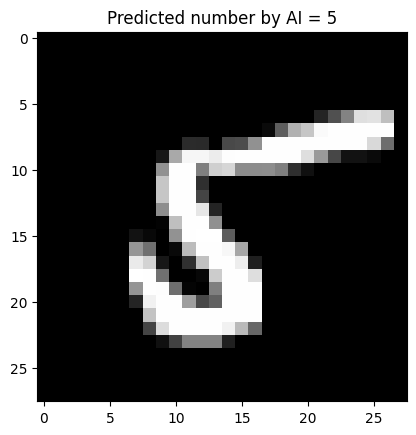

In [99]:
plt.imshow(sample_image,cmap="grey")
plt.title(f"Predicted number by AI = {predicted_label+1}")
plt.show()